# Data Cleaning case - Smartphone dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('smartphones.csv')
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [4]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [5]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

## Data cleaning

## Lets analyze the data manually first by reading the excel file and checkout the problems with our data

- 1)Model column :- some brands are written differently like OPPO, Oppo (small and capital letters)
- 2)Price :- has unnecessary 'Rupees symbol', and ',' between the price, one phone price is 99rupees, which is anomly
- 3) rating :- Missing values
- 4) processor :- has some wrong values instead of processor name, they have memory names
- 5) There is an ipod in row 756 in mobile its not a mobile device, will remove this row
- 6) Ram :- in row 485 there is only inbuilt value, no ram value
- 7) battery :- Incorrect values in some rows
- 8) display :- there are some missing values of refresh rate/frequency
- 9) Price data type should be changed to integer
- 10) Missing values in rating, camera, card and os.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [7]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [8]:
df.duplicated().sum()

0

#### lets handle the columns one by one
### 1) price column


In [9]:
df1 = df.copy()
df1.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [10]:
# price column data cleaning
df1['price'] = df1['price'].str.replace('₹', '').str.replace(',', '').astype('int')
df1.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [11]:
df1 = df1.reset_index()

In [12]:
# increasing index value from zero by 2, so that it matches our manual assesment row values
df1['index'] = df1['index'] + 2
df1['index']

0          2
1          3
2          4
3          5
4          6
        ... 
1015    1017
1016    1018
1017    1019
1018    1020
1019    1021
Name: index, Length: 1020, dtype: int64

In [13]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [14]:
# There are total 68 rows in our data which are problematic for us.
df1[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
...,...,...,...,...,...,...,...,...,...,...,...,...
954,956,Vivo X Fold 5G (12GB RAM + 512GB),118990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 512 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
988,990,Nokia 5310 Dual Sim,3399,NaN,Dual Sim,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser
993,995,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Kirin 990, Octa Core, 2.86 GHz Processor","8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"8 inches, 2200 x 2480 px Display",Foldable Display,48 MP Quad Rear Camera,"Memory Card (Hybrid), upto 256 GB"
1000,1002,XTouch F40 Flip,1999,NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera


In [15]:
# These are common rows which all have problems
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
640,642,Nokia 105 Plus,1299,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
657,659,Zanco Tiny T1,2799,NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
665,667,itel it2163S,958,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
748,750,Nokia 400 4G,3290,NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN
757,759,Karbonn KU3i,995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
817,819,itel Magic X,2239,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


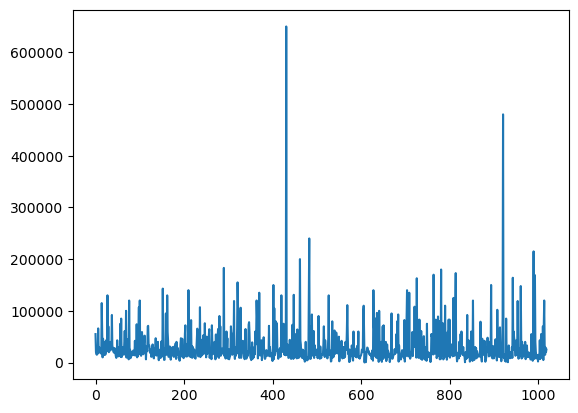

In [16]:
plt.plot(df1['price'])

In [17]:
# Features smartphones are only greater than 3400
df1 = df1[df1['price'] >= 3400]

In [18]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [19]:
# lets see the common columns and rows which have problem now
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


###  Lets work on processor column
### 2) Processor Column

In [20]:
# these are feature phones(not smartphones)
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [21]:
# lets remove this rows from our dataset as they are feature phones
df1.drop([645, 857, 882, 925], inplace=True)

In [22]:
# now lets check whether the processor_rows are removed or not
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


### 3) Ram column

In [23]:
df1['ram'].shape

(987,)

In [24]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [25]:
# dropping the feature phones
df1.drop(582, inplace=True)

In [26]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0


### 4) Battery Column

In [27]:
df1['battery'].shape

(986,)

In [28]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [29]:
df1[df1['index'].isin(battery_rows)]['model']

111                 Apple iPhone 12
149            Apple iPhone 12 Mini
307         Apple iPhone 12 (128GB)
363    Apple iPhone 12 Mini (128GB)
376                 Nokia 2660 Flip
439          Apple iPhone SE 3 2022
448             Apple iPhone 15 Pro
628     Apple iPhone 12 Pro (512GB)
754      Apple iPod Touch (7th Gen)
762               Apple iPhone SE 4
853     Apple iPhone 12 Pro (256GB)
913    Apple iPhone 12 Mini (256GB)
914         Apple iPhone 12 (256GB)
Name: model, dtype: object

#### The problem in the battery column is there are some missing value for battery especially for iphones, so data has shifted by one column, we need to place them in correct place

In [30]:
# dropping feature phones and airpods(which are not smartphones)
df1.drop([376, 754], inplace=True)

In [31]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio


In [32]:
# story battery_rows data in temp_df so that no problem occurs in our original dataFrame
temp_df = df1[df1['index'].isin(battery_rows)]
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio


In [33]:
temp_df.iloc[:, 7:].shift(1, axis=1)

,battery,display,camera,card,os
111,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [34]:
# shifted the values by one column each
temp_df.iloc[:, 7:].shift(1, axis=1)

,battery,display,camera,card,os
111,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [35]:
temp_df_1 = temp_df.iloc[:, 7:].shift(1, axis=1).values

In [36]:
df1.loc[temp_df.index, temp_df.columns].shape

(11, 12)

In [37]:
temp_df_1.shape

(11, 5)

In [38]:
# there are different shapes, lets make the columns from 7 onwards and make changes in original array
df1.loc[temp_df.index, temp_df.columns[7:]] = temp_df_1

In [39]:
# yes the values are shifted by one position in battery
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


### 5) Display Column

In [40]:
len(display_rows)

27

In [41]:
# taking the only rows which have problems in display_rows, which we identify through manual analyzing
df1[df1['index'].isin(display_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
914,916,Apple iPhone 12 (256GB),67999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [42]:
# Here the problem is solved in display_rows, by correcting some other columns 

### 6) Camera Column

In [43]:
len(camera_rows)

64

In [44]:
df1[df1['index'].isin(camera_rows)].shape

(39, 12)

In [45]:
# Here the problem is some of camera data is replaced by memory card data, we need to exchange those positions 
df1[df1['index'].isin(camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [46]:
# dropping feature phones
df1.drop([155, 271], inplace=True)

In [47]:
temp_df = df1[df1['index'].isin(camera_rows)]

In [48]:
# there are 25 columns in camera column whose data is mismatched with memory card data
temp_df = temp_df[~temp_df['camera'].str.contains('MP')]

In [49]:
# taking the index of only those rows which are mismatched and replacing them with correct values in card column
df1.loc[temp_df.index, 'camera'] = temp_df['card'].values

In [50]:
df1[df1['index'].isin(camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


### 7) Card Column

In [51]:
df1['card'].shape

(982,)

In [52]:
df1['card'].value_counts()

Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Android v10                                                             11
Memory Card (Hybrid), upto 512 GB                                       11
Memory Card Supported, up

In [53]:
# from above we can see there are some different values then memory card values like 'OS' and 'camera value'

In [54]:
temp_df = df1[df1['card'].str.contains('MP')]
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
69,71,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,50 MP Quad Rear & 16 MP Front Camera,Android v12
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
365,367,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported
392,394,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported
482,484,Vivo X Fold Plus,113990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4730 mAh Battery with 80W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display wi...",50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera,50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera,Android v12


In [55]:
df1.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [56]:
df1[df1['card'].str.contains('MP')]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


In [57]:
df1['card'].value_counts()

Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v13    

#### Here we need to exchange the rows of 'card' and 'os', as they both are replaced with eachother, 
#### So we will first replace the os with correct os values from card column
#### And then replace the incorrect card column with 'Memory Card Not Supported'

In [58]:
temp_df = df1[~df1['card'].str.contains('Memory Card')]

In [59]:
df1.loc[temp_df.index, 'os'] = temp_df['card'].values

In [60]:
df1.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [61]:
df1['card'].value_counts()

Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: card, dtype: int64

In [62]:
df1['os'].value_counts()

Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                     

### 8) OS Column

In [63]:
# these are the rows which does not have any os, rather they are misplaced with memory card values
df1[df1['os'].str.contains('Memory Card')]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,Memory Card Not Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card Not Supported,"Memory Card Supported, upto 256 GB"
365,367,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
392,394,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
504,506,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
570,572,LG Wing 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 765G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display",64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,"Memory Card (Hybrid), upto 2 TB"
613,615,Oukitel WP21,22990,82.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G99, Octa Core, 2.2 GHz Processor","12 GB RAM, 256 GB inbuilt",9800 mAh Battery with 66W Fast Charging,"6.78 inches, 1080 x 2400 px, 120 Hz Display",64 MP + 20 MP + 2 MP Triple Rear & Main Front ...,Memory Card Not Supported,Memory Card (Hybrid)
682,684,LG V60 ThinQ,79990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display with Punch ...",64 MP + 13 MP + 0.3 MP Triple Rear & 10 MP Fro...,Memory Card Not Supported,"Memory Card (Hybrid), upto 2 TB"
721,723,Asus ROG Phone 6D Ultimate,107990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","16 GB RAM, 512 GB inbuilt",6000 mAh Battery with 65W Fast Charging,"6.78 inches, 1080 x 2448 px, 165 Hz Display",50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...,Memory Card Not Supported,Memory Card Not Supported


In [64]:
df1['os'].value_counts()

Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                     

In [65]:
# Memory Card (Hybrid), Memory Card Supported

In [66]:
temp_df =df1[df1['os'] == 'Memory Card Supported']

In [67]:
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


In [68]:
df1.loc[temp_df.index, 'os'] = np.nan

In [69]:
temp_df = df1[df1['os'].str.contains('Memory Card Not Supported')]
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,Memory Card Not Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
365,367,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
392,394,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
504,506,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
721,723,Asus ROG Phone 6D Ultimate,107990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","16 GB RAM, 512 GB inbuilt",6000 mAh Battery with 65W Fast Charging,"6.78 inches, 1080 x 2448 px, 165 Hz Display",50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...,Memory Card Not Supported,Memory Card Not Supported


In [70]:
df1.loc[temp_df.index, 'os'] = np.nan

In [71]:
df1['os'].value_counts()

Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
iOS v13                                 4
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v15.0                               3
EMUI v12                                2
Android v6.0 (Marshmallow)              2
HarmonyOS v2.0                          2
Memory Card (Hybrid), upto 256 GB       2
Harmony v2.0                            2
iOS v14.0                               2
Memory Card (Hybrid), upto 2 TB         2
Android v5.1.1 (Lollipop)               2
Android v12.1                           2
Memory Card Supported, upto 256 GB

In [72]:
temp_df = df1[df1['os'] == 'Memory Card (Hybrid), upto 256 GB']
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
726,728,Huawei Mate Xs 2,162990,89.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 512 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"7.8 inches, 2200 x 2480 px, 120 Hz Display wit...",50 MP + 13 MP + 8 MP Triple Rear & 10.7 MP Fro...,Memory Card Not Supported,"Memory Card (Hybrid), upto 256 GB"
993,995,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Kirin 990, Octa Core, 2.86 GHz Processor","8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"8 inches, 2200 x 2480 px Display",48 MP Quad Rear Camera,Memory Card Not Supported,"Memory Card (Hybrid), upto 256 GB"


In [73]:
df1.loc[temp_df.index, 'card'] = temp_df['os'].values

In [74]:
df1.loc[temp_df.index, 'os'] = np.nan

In [75]:
temp_df = df1[df1['os'] == 'Memory Card (Hybrid), upto 2 TB']
temp_df


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
570,572,LG Wing 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 765G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display",64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,"Memory Card (Hybrid), upto 2 TB"
682,684,LG V60 ThinQ,79990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display with Punch ...",64 MP + 13 MP + 0.3 MP Triple Rear & 10 MP Fro...,Memory Card Not Supported,"Memory Card (Hybrid), upto 2 TB"


In [76]:
df1.loc[temp_df.index, 'card'] = temp_df['os'].values
df1.loc[temp_df.index, 'os'] = np.nan

In [77]:
temp_df = df1[df1['os'] == 'Memory Card Supported, upto 256 GB']
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card Not Supported,"Memory Card Supported, upto 256 GB"
894,896,Royole FlexPai 3 5G,149999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3360 mAh Battery,"7.2 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card Not Supported,"Memory Card Supported, upto 256 GB"


In [78]:
df1.loc[temp_df.index, 'card'] = temp_df['os'].values
df1.loc[temp_df.index, 'os'] = np.nan

In [79]:
temp_df = df1[df1['os'] == 'Memory Card Supported, upto 128 GB']
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
844,846,CAT S22 Flip,14999,NaN,"Single Sim, 3G, 4G, VoLTE, Wi-Fi","Qualcomm 215, Quad Core, 1.3 GHz Processor","2 GB RAM, 16 GB inbuilt",2000 mAh Battery,"4 inches, 480 x 640 px Display",5 MP Rear & 2 MP Front Camera,Memory Card Not Supported,"Memory Card Supported, upto 128 GB"


In [80]:
df1.loc[temp_df.index, 'card'] = temp_df['os'].values
df1.loc[temp_df.index, 'os'] = np.nan

In [81]:
temp_df = df1[df1['os'] == 'Bluetooth']
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
486,488,Nokia 8000 4G,6899,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon 210, Quad Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth


In [82]:
df1.loc[temp_df.index, 'os'] = np.nan

In [83]:
df1['os'].value_counts()

Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v13                              4
iOS v15.0                            3
Android v12.1                        2
EMUI v12                             2
Android v6.0 (Marshmallow)           2
Android v5.1.1 (Lollipop)            2
HarmonyOS v2.0                       2
Harmony v2.0                         2
iOS v14.0                            2
Android v7.1 (Nougat)                1
RTOS (Series 30+)                    1
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0         

In [84]:
df1.shape

(982, 12)

In [85]:
df1.isnull().sum()

index          0
model          0
price          0
rating       103
sim            0
processor      0
ram            0
battery       11
display        0
camera         0
card           0
os            14
dtype: int64

In [86]:
# removed data percentage from original data
100 - (982/1020) * 100 

3.7254901960784252

In [87]:
df1['sim'].value_counts()

Dual Sim, 3G, 4G, VoLTE, Wi-Fi                               317
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      268
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi                           155
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster                54
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster           52
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                           46
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster                    46
Dual Sim, 3G, 4G, Wi-Fi                                        7
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC                  7
Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      7
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster                5
Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                          4
Single Sim, 3G, 4G, VoLTE, Wi-Fi                               3
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi                       3
Dual Sim, 3G, 4G, Wi-Fi, NFC                                   2
Single Sim, 3G, 4G, Wi-Fi

# Feature Engineering (creating new columns)
- Creating new columns from existing columns 
- Useful for analysis and model performance

In [88]:
df1.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### lets create a new column name brand_name from model

In [89]:
brand_name = df1['model'].str.split(' ').str.get(0)

In [90]:
df1.insert(1, 'brand_name', brand_name)

In [91]:
df1['brand_name'] = df1['brand_name'].str.lower()
df1.head()

,index,brand_name,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Lets create 3 new columns from 'sim' feature. 
- 1) has_5g
- 2) has_nfc
- 3) has_ir_blaster

which are crucial in deciding price of a smartphone

In [92]:
has_5g = df['sim'].str.contains('5G')
has_nfc = df['sim'].str.contains('NFC')
has_ir_blaster = df['sim'].str.contains('IR Blaster')

df1.insert(6, 'has_5g', has_5g)
df1.insert(7, 'has_nfc', has_nfc)
df1.insert(8, 'has_ir_blaster', has_ir_blaster)

In [93]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Lets create 4 new columns from the 'processor'
- 1) processor_name
- 2) processor_num_cores
- 3) processor_speed

In [94]:
processor_name = df['processor'].str.split(',').str.get(0)
processor_num_cores = df['processor'].str.split(',').str.get(1)
processor_speed = df['processor'].str.split(',').str.get(2)

df1.insert(10, 'processor_name', processor_name)
df1.insert(11, 'processor_num_cores', processor_num_cores)
df1.insert(12, 'processor_speed', processor_speed)

In [95]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,Octa Core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### There are some values shifted , lets replace them at their correct postition using the function 'shift()'

In [96]:
df1['processor_name'] = df1['processor_name'].str.strip()

In [97]:
temp_df = df1[df1['processor_name'].str.contains('Core')][['processor_name', 'processor_num_cores', 'processor_speed']].shift(1, axis=1)
temp_df

,processor_name,processor_num_cores,processor_speed
118,None,Octa Core Processor,NaN
143,None,Quad Core,1.4 GHz Processor
188,None,Quad Core,1.6 GHz Processor
201,None,Octa Core,2 GHz Processor
309,None,Octa Core,2 GHz Processor
315,None,Quad Core,1.3 GHz Processor
496,None,Octa Core Processor,NaN
529,None,Octa Core Processor,NaN
587,None,Octa Core,2 GHz Processor
758,None,Quad Core,1.6 GHz Processor


In [98]:
df1.loc[temp_df.index, ['processor_name', 'processor_num_cores', 'processor_speed']] = temp_df.values

In [99]:
df1[df1['processor_name'] == '(28 nm)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_num_cores,processor_speed,ram,battery,display,camera,card,os
856,858,samsung,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",(28 nm),Quad Core,1.5 GHz Processor,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [100]:
# lets change the processor name of 856 row
df1.loc[856, 'processor_name'] = 'Mediatek MT6739'

In [101]:
processor_brand = df1['processor_name'].str.split(' ').str.get(0).str.lower()
df1.insert(11, 'processor_brand', processor_brand)

In [102]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [103]:
df1['processor_num_cores'] = df1['processor_num_cores'].str.strip()
df1['processor_num_cores'].value_counts()

Octa Core              871
Quad Core               37
Hexa Core               31
Octa Core Processor     28
Hexa Core Processor      8
Name: processor_num_cores, dtype: int64

In [104]:
df1['processor_num_cores'] = df1['processor_num_cores'].str.replace("Octa Core Processor", "Octa Core").str.replace("Hexa Core Processor", "Hexa Core")
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4 GHz Processor,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [105]:
df1['processor_speed'].str.split(' ')
# there are leading spaces lets remove them using strip

0        [, 3.2 GHz, Processor]
1        [, 2.2 GHz, Processor]
2        [, 2.4 GHz, Processor]
3        [, 2.2 GHz, Processor]
4        [, 2.6 GHz, Processor]
                 ...           
1015       [, 3 GHz, Processor]
1016     [, 2.2 GHz, Processor]
1017    [, 2.85 GHz, Processor]
1018     [, 2.2 GHz, Processor]
1019                        NaN
Name: processor_speed, Length: 982, dtype: object

In [106]:
df1['processor_speed'] = df1['processor_speed'].str.strip().str.split().str.get(0).astype(float)

In [107]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### lets create new column with 'ram' column 

In [108]:
# this is a unicode character (mini space) we need to remove it
df1['ram'].str.split(',').str.get(0).str.split(' ').str.get(0).str.split(' ').str.get(0)[0]

'12\u2009GB'

In [109]:
ram_capacity = df1['ram'].str.strip().str.split(',').str.get(0).str.findall(r'(\d+)').str.get(0)
df1.insert(15, 'ram_capacity(GB)', ram_capacity)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [110]:
internal_memory = df['ram'].str.strip().str.split(',').str.get(1).str.strip().str.findall(r'(\d+)').str.get(0)
df1.insert(16, 'internal_memory(GB)', internal_memory)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12,256,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6,128,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4,64,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6,128,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6,128,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [111]:
df1['ram_capacity(GB)'].value_counts()

8      339
6      234
4      215
12      85
3       54
2       32
16       9
1        7
64       3
18       2
512      2
Name: ram_capacity(GB), dtype: int64

### There are some wrong values in ram_capacity we need to shift the positions and replace it with correct values 

In [112]:
df1['ram_capacity(GB)'] = df1['ram_capacity(GB)'].astype(float)
df1['ram_capacity(GB)'].dtype

dtype('float64')

In [113]:
df1[df1['ram_capacity(GB)'] >18][['ram', 'ram_capacity(GB)', 'internal_memory(GB)' ]]

,ram,ram_capacity(GB),internal_memory(GB)
439,64 GB inbuilt,64.0,NaN
483,512 GB inbuilt,512.0,NaN
486,"512 MB RAM, 4 GB inbuilt",512.0,4
627,"64 MB RAM, 128 MB inbuilt",64.0,128
762,64 GB inbuilt,64.0,NaN


In [114]:
# here we converted ram_capacity to float and kept internal_memory in string
# These 2 indexes are misplaced so we will replace with correct values and for rest of 3 we will google it and assign their correct values

df1.loc[[439, 762], ['ram_capacity(GB)', 'internal_memory(GB)']] = [[4, '64'], [4, '64']]

# df1[df1['ram_capacity(GB)'] >18]

# # here 486,627 are feature phones so we will drop them(we are working for smartphone dataset)

# df1.drop([486, 627], inplace=True)
# df1[df1['ram_capacity(GB)'] >18]

In [115]:
df1[df1['ram_capacity(GB)'] >18]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,display,camera,card,os
483,485,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.2,512 GB inbuilt,512.0,NaN,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
486,488,nokia,Nokia 8000 4G,6899,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Snapdragon 210, Quad Core, 1.1 GHz Processor",Snapdragon 210,snapdragon,Quad Core,1.1,"512 MB RAM, 4 GB inbuilt",512.0,4,1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,NaN
627,629,nokia,Nokia 225 4G,3589,NaN,"Dual Sim, 3G, 4G, VoLTE",False,False,False,Unisoc T117,Unisoc T117,unisoc,NaN,NaN,"64 MB RAM, 128 MB inbuilt",64.0,128,1150 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",RTOS (Series 30+)


In [116]:
df1.drop([486, 627], inplace=True)
df1[df1['ram_capacity(GB)'] >18]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,display,camera,card,os
483,485,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.2,512 GB inbuilt,512.0,NaN,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0


<AxesSubplot: >

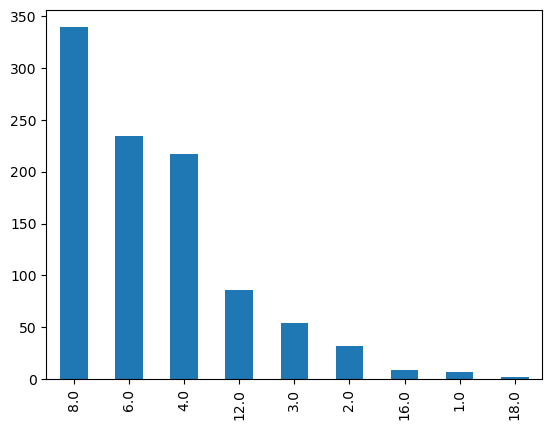

In [117]:
# we will replace the index 483 with its correct values
df1.loc[[483], ['ram_capacity(GB)', 'internal_memory(GB)']] = [12.0, '512']
df1['ram_capacity(GB)'].value_counts().plot(kind='bar')

In [118]:
df1['internal_memory(GB)'].value_counts()

128    523
64     193
256    157
32      67
512     22
16      12
1        5
8        1
Name: internal_memory(GB), dtype: int64

<AxesSubplot: >

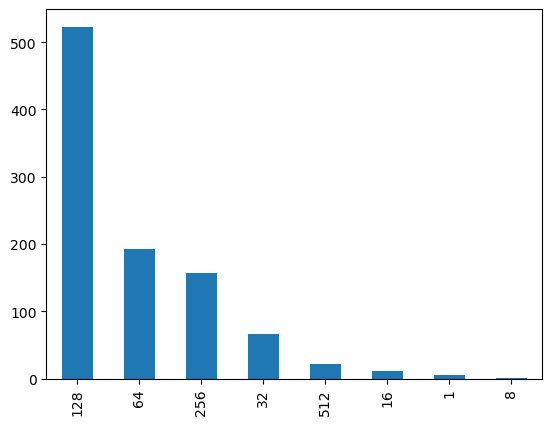

In [119]:
# lets plot the internal memory and see visually
df1['internal_memory(GB)'].value_counts().plot(kind='bar')

In [120]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### Lets make new column with 'Battery' column

In [121]:
battery_capacity = df1['battery'].str.split('with').str.get(0).str.strip().str.findall(r'(\d+)').str.get(0).astype(float)
df1.insert(18, 'battery_capacity', battery_capacity)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [122]:
fast_charging = df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d+').str.get(0)
df1.insert(19, 'fast_charging', fast_charging)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


<AxesSubplot: >

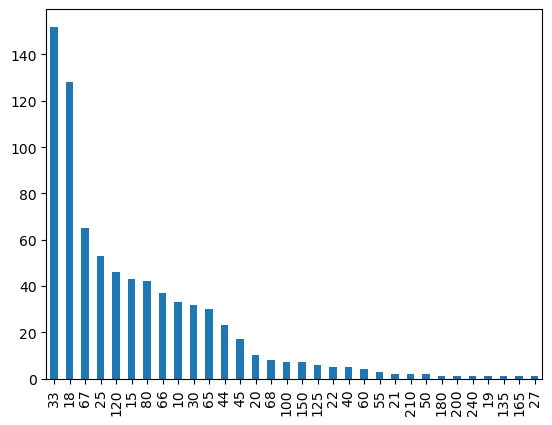

In [123]:
df1['fast_charging'].value_counts().plot(kind='bar')

## Lets create new column with 'display' column
- 1) screen_size
- 2) resolution
- 3) refresh_rate

In [124]:
screen_size = df1['display'].str.split(',').str.get(0).str.split(' ').str.get(0).str.strip()
df1.insert(21, 'screen_size(inches)', screen_size)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [125]:
screen_resolution = df1['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)
df1.insert(22, 'screen_resolution(Px)', screen_resolution)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [126]:
refresh_rate = df1['display'].str.strip().str.split(',').str.get(2).str.strip().str.split(' ').str.get(0).str.strip().apply(lambda x: 60 if pd.isna(x) else x).astype(int)
df1.insert(23, 'refresh_rate(Hz)', refresh_rate)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


## Lets create new column with 'camera' column
- 1) Rear cameras
- 2) front cameras
- 3) primary rare MP
- 4) primary front MP

In [127]:
def camera_extractor(text):
    if 'Quad' in text:
        return 4
    elif 'Triple' in text:
        return 3
    elif 'Dual' in text:
        return 2
    else:
        return 1

In [128]:
num_rear_cameras = df1['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)
df1.insert(25, 'num_rear_cameras', num_rear_cameras)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,Memory Card Not Supported,Android v13


In [129]:
def camera_extractor(text):
    if 'Quad' in text:
        return 4
    elif 'Triple' in text:
        return 3
    elif 'Dual' in text:
        return 2
    elif 'Missing' in text:
        return 'Missing'
    else:
        return 1

In [130]:
num_front_cameras = df1['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)
df1.insert(26, 'num_front_cameras', num_front_cameras)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13


In [131]:
#df1[df1['camera'] == 'Foldable Display, Dual Display']
df1.loc[69,'camera'] == '50 MP'

False

In [132]:
temp_df = df1[df1['camera'] == 'Foldable Display, Dual Display']
df1.loc[temp_df.index, 'camera'] = '50 MP'

In [133]:
primary_camera_rear = df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)
df1.insert(27, 'primary_camera_rear', primary_camera_rear)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,Memory Card Not Supported,Android v13


In [134]:
primary_camera_front = df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)
df1.insert(28,'primary_camera_front', primary_camera_front)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,16,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,16,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,13,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card Not Supported,Android v13


## Lets create new column with 'Card' columns
- 1) extended_memory_card

In [135]:
df1[df1['card'] == 'Memory Card (Hybrid)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,os
25,27,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",8.0,128,4500 mAh Battery with Fast Charging,4500.0,NaN,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.5,1080 x 2400,120,12 MP + 12 MP + 8 MP Triple Rear & 32 MP Front...,3,1,12,32,Memory Card (Hybrid),Android v10
80,82,motorola,Motorola Moto G72 4G,15999,83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Helio G99, Octa Core, 2.2 GHz Processor",Helio G99,helio,Octa Core,2.20,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card (Hybrid),Android v12
147,149,samsung,Samsung Galaxy M34 5G,16999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Exynos 1200, Octa Core, 2.4 GHz Processor",Exynos 1200,exynos,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",6.0,128,6000 mAh Battery with 25W Fast Charging,6000.0,25,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.5,1080 x 2400,120,64 MP Quad Rear & 32 MP Front Camera,4,1,64,32,Memory Card (Hybrid),Android v12
151,153,motorola,Motorola Moto G52,11999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.6,2460 x 1080,90,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,Memory Card (Hybrid),Android v12
178,180,vivo,Vivo Y75 5G,21990,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 700 5G, Octa Core, 2.2 GHz Processor",Dimensity 700 5G,dimensity,Octa Core,2.20,"8 GB RAM, 128 GB inbuilt",8.0,128,5000 mAh Battery with 18W Fast Charging,5000.0,18,"6.58 inches, 1080 x 2408 px Display with Water...",6.58,1080 x 2408,60,50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,Memory Card (Hybrid),Android v12
204,206,motorola,Motorola Moto G52 (6GB RAM + 128GB),12999,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.6,2460 x 1080,90,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,Memory Card (Hybrid),Android v12
248,250,motorola,Motorola Moto G73,25999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 930, Octa Core, 2.2 GHz Processor",Dimensity 930,dimensity,Octa Core,2.20,"8 GB RAM, 256 GB inbuilt",8.0,256,5000 mAh Battery with 30W Fast Charging,5000.0,30,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.5,1080 x 2400,120,50 MP + 8 MP Dual Rear & 16 MP Front Camera,2,1,50,16,Memory Card (Hybrid),Android v13
254,256,xiaomi,Xiaomi Redmi Note 11 Pro 5G,17990,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",True,False,True,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.20,"6 GB RAM, 64 GB inbuilt",6.0,64,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",6.67,1080 x 2400,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card (Hybrid),Android v11
281,283,vivo,Vivo V23e 5G,21994,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 810 5G

In [136]:
df1.loc[temp_df.index, 'card'] = 'Not Specified'

In [137]:
extended_memory= df1['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')
df1.insert(30, 'extended_memory', extended_memory)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,extended_memory,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,16,Memory Card Not Supported,0,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,16,"Memory Card (Hybrid), upto 1 TB",1 TB,Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,13,"Memory Card Supported, upto 1 TB",1 TB,Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,"Memory Card (Hybrid), upto 1 TB",1 TB,Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card Not Supported,0,Android v13


In [138]:
df1.loc[temp_df.index, 'os'] = 'Not Specified'

## lets create new column with 'OS' column
- 1) OS

In [139]:
df1['os'].value_counts()

Android v12                        393
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v11.0                        4
iOS v13                              4
Android v8.0 (Oreo)                  4
iOS v15.0                            3
Android v5.1.1 (Lollipop)            2
Harmony v2.0                         2
HarmonyOS v2.0                       2
Android v6.0 (Marshmallow)           2
iOS v14.0                            2
EMUI v12                             2
Android v12.1                        2
Memory Card (Hybrid)                 1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
Android                              1
HarmonyOS                

In [140]:
def os_extractor(string):
    
    if 'Android' in string:
        return 'android'
    elif 'iOS' in string:
        return 'ios'
    elif 'Not Specified' in string:
        return string
    elif 'Harmony' in string or 'Hongmeng' in string or 'EMUI' in string:
        return 'other'

In [141]:
df1['os'].fillna('Nan', inplace=True)

In [142]:
df1['os'] = df1['os'].apply(lambda x: os_extractor(x))


In [143]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,extended_memory,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,16,Memory Card Not Supported,0,android
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,13,"Memory Card Supported, upto 1 TB",1 TB,android
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card Not Supported,0,android


In [144]:
df1.columns

Index(['index', 'brand_name', 'model', 'price', 'rating', 'sim', 'has_5g',
       'has_nfc', 'has_ir_blaster', 'processor', 'processor_name',
       'processor_brand', 'processor_num_cores', 'processor_speed', 'ram',
       'ram_capacity(GB)', 'internal_memory(GB)', 'battery',
       'battery_capacity', 'fast_charging', 'display', 'screen_size(inches)',
       'screen_resolution(Px)', 'refresh_rate(Hz)', 'camera',
       'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
       'primary_camera_front', 'card', 'extended_memory', 'os'],
      dtype='object')

In [145]:
df1['rating'].fillna(df1['rating'].mean(), inplace=True)
df1['rating'] = df1['rating'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  980 non-null    int64  
 1   brand_name             980 non-null    object 
 2   model                  980 non-null    object 
 3   price                  980 non-null    int64  
 4   rating                 980 non-null    int64  
 5   sim                    980 non-null    object 
 6   has_5g                 980 non-null    bool   
 7   has_nfc                980 non-null    bool   
 8   has_ir_blaster         980 non-null    bool   
 9   processor              980 non-null    object 
 10  processor_name         960 non-null    object 
 11  processor_brand        960 non-null    object 
 12  processor_num_cores    974 non-null    object 
 13  processor_speed        938 non-null    float64
 14  ram                    980 non-null    object 
 15  ram_c

In [146]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,extended_memory,os
0,2,oneplus,OnePlus 11 5G,54999,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,16,Memory Card Not Supported,0,android
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
2,4,samsung,Samsung Galaxy A14 5G,16499,75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,13,"Memory Card Supported, upto 1 TB",1 TB,android
3,5,motorola,Motorola Moto G62 5G,14999,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
4,6,realme,Realme 10 Pro Plus,24999,82,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card Not Supported,0,android


In [147]:
df1['processor_num_cores'].value_counts()

Octa Core    899
Hexa Core     39
Quad Core     36
Name: processor_num_cores, dtype: int64

In [148]:
def convet_to_int(word):
    if word == 'Octa Core':
        return 8
    elif word == 'Hexa Core':
        return 6
    else:
        return 4

In [149]:
df1['processor_num_cores'] = df1['processor_num_cores'].apply(convet_to_int)
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,extended_memory,os
0,2,oneplus,OnePlus 11 5G,54999,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,8,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,16,Memory Card Not Supported,0,android
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,8,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
2,4,samsung,Samsung Galaxy A14 5G,16499,75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,8,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,13,"Memory Card Supported, upto 1 TB",1 TB,android
3,5,motorola,Motorola Moto G62 5G,14999,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,8,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
4,6,realme,Realme 10 Pro Plus,24999,82,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,8,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card Not Supported,0,android


In [150]:
# df1[df1['battery'].str.strip().str.contains('Fast Charging')]
temp_df = df1['battery'].str.strip().str.split(' ').str.get(4)
temp = df1.loc[temp_df.index, 'fast_charging_available'] = 1
df1.insert(19, 'Fast_charging_available', temp)

In [151]:
df1.drop('fast_charging_available', axis=1, inplace=True)

In [152]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,processor_num_cores,processor_speed,ram,ram_capacity(GB),internal_memory(GB),battery,battery_capacity,Fast_charging_available,fast_charging,display,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),camera,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,extended_memory,os
0,2,oneplus,OnePlus 11 5G,54999,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,8,3.2,"12 GB RAM, 256 GB inbuilt",12.0,256,5000 mAh Battery with 100W Fast Charging,5000.0,1,100,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,1440 x 3216,120,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,50,16,Memory Card Not Supported,0,android
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,8,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 33W Fast Charging,5000.0,1,33,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,1080 x 2412,120,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,64,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
2,4,samsung,Samsung Galaxy A14 5G,16499,75,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,8,2.4,"4 GB RAM, 64 GB inbuilt",4.0,64,5000 mAh Battery with 15W Fast Charging,5000.0,1,15,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.6,1080 x 2408,90,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,50,13,"Memory Card Supported, upto 1 TB",1 TB,android
3,5,motorola,Motorola Moto G62 5G,14999,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,8,2.2,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with Fast Charging,5000.0,1,NaN,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,1080 x 2400,120,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,50,16,"Memory Card (Hybrid), upto 1 TB",1 TB,android
4,6,realme,Realme 10 Pro Plus,24999,82,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,8,2.6,"6 GB RAM, 128 GB inbuilt",6.0,128,5000 mAh Battery with 67W Fast Charging,5000.0,1,67,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.7,1080 x 2412,120,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,108,16,Memory Card Not Supported,0,android


In [153]:
df1.drop(columns = ['index', 'sim', 'processor', 'processor_name','ram', 'battery', 'display', 'camera'], axis=1, inplace=True)

In [154]:
df1['card'].value_counts()

Memory Card Not Supported              354
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported, upto 256 GB      89
Memory Card Supported                   88
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       15
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       7
Memory Card Supported, upto 2 TB         5
Memory Card (Hybrid), upto 128 GB        3
Memory Card Supported, upto 32 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 2 TB          3
Not Specified                            1
Memory Card Supported, upto 1000 GB      1
Name: card, dtype: int64

In [155]:
temp_df = df1[df1['card'].str.strip().str.contains('Not')]
df1.loc[temp_df.index, 'card'] = 'No'

In [156]:
temp_df = df1[df1['card'].str.strip().str.contains('Memory')]
df1.loc[temp_df.index, 'card'] = 'Yes'

In [157]:
def convert_to_int(word):
    if word == 'Yes':
        return 1
    else:
        return 0

In [158]:
df1['card'] = df1['card'].apply(convert_to_int)
df1.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_num_cores,processor_speed,ram_capacity(GB),internal_memory(GB),battery_capacity,Fast_charging_available,fast_charging,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,card,extended_memory,os
0,oneplus,OnePlus 11 5G,54999,89,True,True,False,snapdragon,8,3.2,12.0,256,5000.0,1,100,6.7,1440 x 3216,120,3,1,50,16,0,0,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,True,False,False,snapdragon,8,2.2,6.0,128,5000.0,1,33,6.59,1080 x 2412,120,3,1,64,16,1,1 TB,android
2,samsung,Samsung Galaxy A14 5G,16499,75,True,False,False,exynos,8,2.4,4.0,64,5000.0,1,15,6.6,1080 x 2408,90,3,1,50,13,1,1 TB,android
3,motorola,Motorola Moto G62 5G,14999,81,True,False,False,snapdragon,8,2.2,6.0,128,5000.0,1,NaN,6.55,1080 x 2400,120,3,1,50,16,1,1 TB,android
4,realme,Realme 10 Pro Plus,24999,82,True,False,False,dimensity,8,2.6,6.0,128,5000.0,1,67,6.7,1080 x 2412,120,3,1,108,16,0,0,android


In [159]:
df1.rename(
   columns = {'card' : 'extended_memory_available'},
   inplace=True
)

In [160]:
df1.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_num_cores,processor_speed,ram_capacity(GB),internal_memory(GB),battery_capacity,Fast_charging_available,fast_charging,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_memory,os
0,oneplus,OnePlus 11 5G,54999,89,True,True,False,snapdragon,8,3.2,12.0,256,5000.0,1,100,6.7,1440 x 3216,120,3,1,50,16,0,0,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,True,False,False,snapdragon,8,2.2,6.0,128,5000.0,1,33,6.59,1080 x 2412,120,3,1,64,16,1,1 TB,android
2,samsung,Samsung Galaxy A14 5G,16499,75,True,False,False,exynos,8,2.4,4.0,64,5000.0,1,15,6.6,1080 x 2408,90,3,1,50,13,1,1 TB,android
3,motorola,Motorola Moto G62 5G,14999,81,True,False,False,snapdragon,8,2.2,6.0,128,5000.0,1,NaN,6.55,1080 x 2400,120,3,1,50,16,1,1 TB,android
4,realme,Realme 10 Pro Plus,24999,82,True,False,False,dimensity,8,2.6,6.0,128,5000.0,1,67,6.7,1080 x 2412,120,3,1,108,16,0,0,android


In [161]:
df1['extended_memory'].value_counts()

0                       355
1 TB                    262
512 GB                  116
256 GB                  104
Not Specified            88
Memory Card (Hybrid)     30
128 GB                   10
2 TB                      8
32 GB                     3
64 GB                     3
1000 GB                   1
Name: extended_memory, dtype: int64

In [162]:
def convert_extended_memory(word):
    if word == '1 TB' or word =='1000 GB':
        return 1024
    elif word == '2 TB':
        return 2048
    elif word == '0' or word == 'Not Specified' or word == 'Memory Card (Hybrid)':
        return np.nan
    else:
        return word

In [163]:
df1['extended_memory'] = df1['extended_memory'].apply(convert_extended_memory)
df1.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,processor_num_cores,processor_speed,ram_capacity(GB),internal_memory(GB),battery_capacity,Fast_charging_available,fast_charging,screen_size(inches),screen_resolution(Px),refresh_rate(Hz),num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_memory,os
0,oneplus,OnePlus 11 5G,54999,89,True,True,False,snapdragon,8,3.2,12.0,256,5000.0,1,100,6.7,1440 x 3216,120,3,1,50,16,0,NaN,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,True,False,False,snapdragon,8,2.2,6.0,128,5000.0,1,33,6.59,1080 x 2412,120,3,1,64,16,1,1024,android
2,samsung,Samsung Galaxy A14 5G,16499,75,True,False,False,exynos,8,2.4,4.0,64,5000.0,1,15,6.6,1080 x 2408,90,3,1,50,13,1,1024,android
3,motorola,Motorola Moto G62 5G,14999,81,True,False,False,snapdragon,8,2.2,6.0,128,5000.0,1,NaN,6.55,1080 x 2400,120,3,1,50,16,1,1024,android
4,realme,Realme 10 Pro Plus,24999,82,True,False,False,dimensity,8,2.6,6.0,128,5000.0,1,67,6.7,1080 x 2412,120,3,1,108,16,0,NaN,android


In [172]:
export_df = df1

In [175]:
export_df.to_csv('smartphone_dataset_myversion.csv', index=False)